# 机器学习工程师纳米学位
## 深度学习
## 项目：搭建一个数字识别项目

在此文件中，我们提供给你了一个模板，以便于你根据项目的要求一步步实现要求的功能，进而完成整个项目。如果你认为需要导入另外的一些代码，请确保你正确导入了他们，并且包含在你的提交文件中。以**'练习'**开始的标题表示接下来你将开始实现你的项目。注意有一些练习是可选的，并且用**'可选'**标记出来了。

在此文件中，有些示例代码已经提供给你，但你还需要实现更多的功能让项目成功运行。除非有明确要求，你无须修改任何已给出的代码。以'练习'开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以'TODO'标出。请仔细阅读所有的提示！

除了实现代码外，你还必须回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**注意：** Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 连接 mnist 的字符来合成数据

你可以通过连接[MNIST](http://yann.lecun.com/exdb/mnist/)的字符来合成数据来训练这个模型。为了快速导入数据集，我们可以使用 [Keras Datasets](https://keras.io/datasets/#mnist-database-of-handwritten-digits) [中文文档](http://keras-cn.readthedocs.io/en/latest/other/datasets/#mnist)。

### 载入 mnist

In [1]:
from keras.datasets import mnist

(X_raw, y_raw), (X_raw_test, y_raw_test) = mnist.load_data()

n_train, n_test = X_raw.shape[0], X_raw_test.shape[0]

Using TensorFlow backend.


### 可视化 mnist

我们可以通过 matplotlib 来可视化我们的原始数据集。

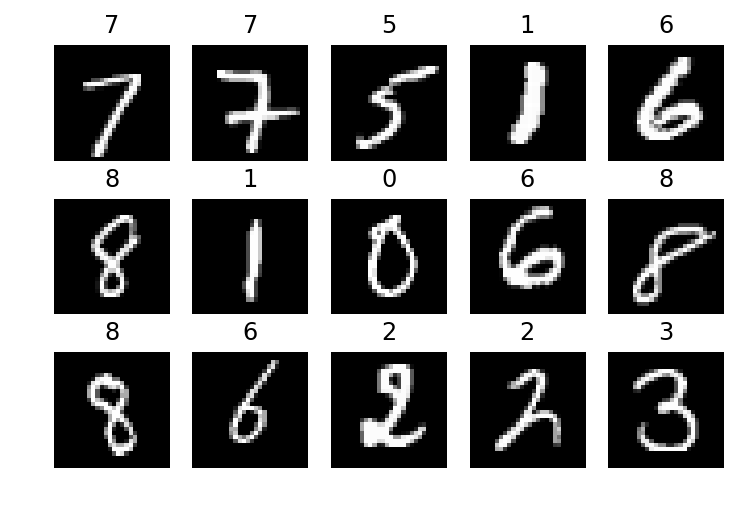

In [2]:
import matplotlib.pyplot as plt
import random

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for i in range(15):
    plt.subplot(3, 5, i+1)
    index = random.randint(0, n_train-1)
    plt.title(str(y_raw[index]))
    plt.imshow(X_raw[index], cmap='gray')
    plt.axis('off')

### 练习：合成数据

你需要随机取随机张图片，然后将它们拼接成新的图片。

你需要设置20%的数据作为验证集，以保证模型没有过拟合。

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

n_class, n_len, width, height = 11, 5, 28, 28

def generate_dataset(X, y):
    X_len = X.shape[0]
    
    X_gen = np.zeros((X_len, height, width*n_len, 1), dtype=np.uint8)
    y_gen = [np.zeros((X_len, n_class), dtype=np.uint8) for i in range(n_len)]
    # TODO: 随机取1~5个数字，并拼接成新的图片
    
    for i in range(0,X_len): #需要生成X_len张图片，所以有X_len次随机取数过程
        num = random.randint(1, 5) #随机取一个数
        for t in range(0,num):
            s = random.randint(0,X_len-1)
            X_t = X[s] #随机从X中挑选一张图片作为新图片的第t个图
            #插入到x_gen中，计算宽度所占的位置
            t_start = t * width
            t_end = t * width + width
            X_gen[i][:,t_start:t_end,0] = X_t
            #同时把对应的数字信息标记到y_gen上
            y_gen[t][i][y[s]] = 1
        
        for v in range(num,5):
            y_gen[v][i][-1] = 1 #图片中空缺的标签打上10
            
    return X_gen, y_gen

X_raw_train, X_raw_valid, y_raw_train, y_raw_valid = train_test_split(X_raw, y_raw, test_size=0.2, random_state=42)

X_train, y_train = generate_dataset(X_raw_train, y_raw_train)
X_valid, y_valid = generate_dataset(X_raw_valid, y_raw_valid)
X_test, y_test = generate_dataset(X_raw_test, y_raw_test)

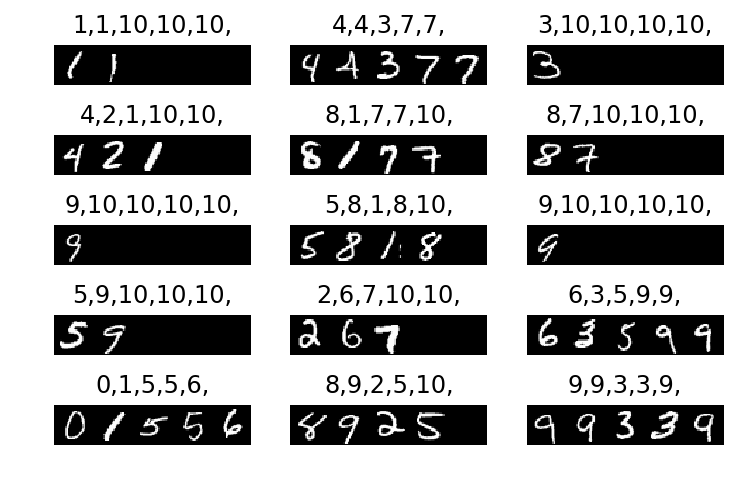

In [4]:
# 显示生成的图片
for i in range(15):
    plt.subplot(5, 3, i+1)
    index = random.randint(0, n_test-1)
    title = ''
    for j in range(n_len):
        title += str(np.argmax(y_test[j][index])) + ','
    
    plt.title(title)
    plt.imshow(X_test[index][:,:,0], cmap='gray')
    plt.axis('off')

### 问题 1
_你是如何合成数据集的？为什么要分训练集，验证集和测试集？_

**回答：**

原有mnist数据集的每张图片都是28*28。为了合成新的数据集，每次从mnist中随机抽取1-5个数字，横向拼接成新的图片，大小为28*140。如果随机选取的数字不足5张，则用空格填充。最终得到一个(n,28,140,1)的新数据集。

**训练集**主要是用来用来拟合模型，通过设置分类器的参数，训练分类模型。**验证集**则是对学习出来的多个模型，为了能找出效果最佳的模型，使用各个模型对验证集数据进行预测，根据准确率，选出效果最佳的模型所对应的参数，即用来调整模型参数。**测试集**可以看作从来不存在的数据集，当已经确定模型参数后，用于测试并评价模型的性能。


### 练习：设计并测试一个模型架构

设计并实现一个能够识别数字序列的深度学习模型。为了产生用于测试的合成数字序列，你可以进行如下的设置：比如，你可以限制一个数据序列最多五个数字，并在你的深度网络上使用五个分类器。同时，你有必要准备一个额外的“空白”的字符，以处理相对较短的数字序列。

在思考这个问题的时候有很多方面可以考虑：

- 你的模型可以基于深度神经网络或者是卷积神经网络。
- 你可以尝试是否在每个分类器间共享权值。
- 你还可以在深度神经网络中使用循环网络来替换其中的分类层，并且将数字序列里的数字一个一个地输出。

在使用 Keras 搭建模型的时候，你可以使用 [函数式模型 API](http://keras-cn.readthedocs.io/en/latest/models/model/) 的方式来搭建多输出模型。

In [5]:
from keras.models import Model
from keras.layers import *
from keras.losses import categorical_crossentropy
from keras.optimizers import Adadelta

# TODO: 构建你的模型
input_data = Input(shape=(28,140,1))
a = Conv2D(32,(3,3), padding='same',activation='relu')(input_data)
a = MaxPool2D(pool_size=(2,2))(a)
a = Conv2D(64,(3,3),padding='same',activation='relu')(a)
a = MaxPool2D(pool_size=(2,2))(a)
a = Flatten()(a)
a = Dropout(0.5)(a)
out_data = [Dense(11, activation='softmax')(a) for i in range(n_len)] #全连接层
model = Model(inputs=input_data,outputs=out_data)
model.compile(loss=categorical_crossentropy,optimizer=Adadelta(),metrics=['accuracy'])

### 问题 2
_你为解决这个问题采取了什么技术？请详细介绍你使用的技术。_

**回答：** 

为了解决这个问题，我应用了CNN卷积神经网络技术。
利用keras学习库搭建卷积神经网络，对输入的每张图片通过两层卷积神经网络对图像进行卷积，利用relu函数对卷积的数据进行激活。并且用2×2的max_pool在卷积过程中进行池化，从而达到减少数据的特征的目的。卷积后的结果通过Flatten() 将数据一维化，并用Dropout方法降低过拟合问题。最后是包含11个神经元的输出层，激活函数为Softmax。

**涉及到的具体技术说明：**
1. 首先，应用的是卷积技术。在模型中的卷积层中，通常包含若干个特征平面，每个特征平面由一些矩形排列的的神经元组成，同一特征平面的神经元共享权值，这里共享的权值就是卷积核(滤波器)。在网络的训练过程中卷积核(滤波器)将通过学习得到合理的权值。一般来说，第一层卷积层的滤波器用来检测低阶特征，比如边、角、曲线等。随着卷积层的增加，对应滤波器检测的特征就更加复杂。卷积层的本质是个特征抽取层。
2. 在两个卷积层中，均利用了relu函数对卷积的数据进行激活。该函数数学公式为：f(x)=max(x,0)，如果输入小于 0，修正线性单元的输出是 0，如果输入大于 0，则输出等于输入。对大型模型来说，relu函数相比sigmod函数计算量小很多，训练速度要快很多，而且不会有 sigmoid 梯度消失的问题。
3. 第三、五层用利用了最大池化的技术。利用了 2x2 的滤波器，选择每个步长所产出的最大值作为下一层传输，压缩了图片，从而达到简化模型的作用，让神经网络专注于最重要的元素。我们选择最大池化而不是最小池化的原因是我们更在乎特征有没有，而不关心特征位置在哪个像素点上。因此用最大池化，把某个 (2, 2) 区域的特征分布缩减为一个数字，来表示某区域有没有该特征。
4. 第七层是一个dropout层，它的作用是在训练过程中随机让某些隐含层节点不工作，减少冗余的学习，实践表明dropout方法可以使网络更加稳固，减少过拟合分风险(不工作节点可以认为不是网络结构的一部分，但是它的权重得保留下来，下次样本输入时可能又会工作)
5. softmax函数将每个单元的输出压缩到0和1之间,在拆分输出时会使输出之和等于1。softmax函数的输出等于分类概率分布，显示了任何类别为真的概率。但是如果进行多项分类的话，需要使用多个输出单元（每个类别一个单元），并对输出进行softmax激活，解决了sigmoid可用于只有一个输出单元的二元分类的问题。
6. 模型中应用了Adadelta作为优化器。Adadelta算法是梯度算法的一个变种，避免手动调节学习率，可以让其在学习的过程中自己变化。本质是对Adagrad算法的扩展，依然是对学习率进行自适应约束，但是进行了计算上的简化，速度较快。实践表明，adadelta在MNIST上学习性能较强。

参考：
1. https://classroom.udacity.com/nanodegrees/nd009/parts/9f359353-1efd-4eec-a336-ed2539f6bb29/modules/fe7d3745-38da-4893-9b8c-ec539c39d383/lessons/6ec4ffd6-4f5c-4b88-bdf6-f169119834f0/concepts/8ee4c905-fa9c-40a4-9fd7-427a155b81b4
2. http://blog.csdn.net/luo123n/article/details/48239963

### 可视化你的网络模型

参考链接：[可视化visualization](http://keras-cn.readthedocs.io/en/latest/other/visualization/)

可以是保存成 PNG 格式显示，也可以直接使用 SVG 格式。 SVG 是矢量图，它的优点是可以无限放大。

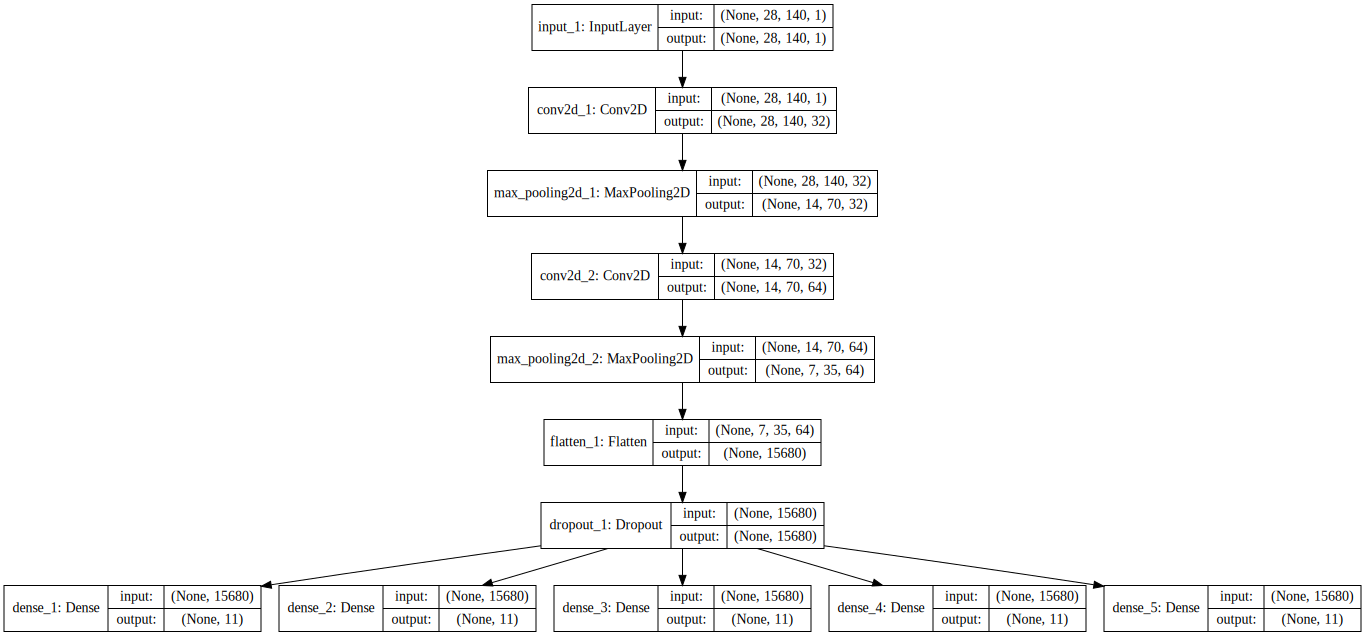

In [6]:
from keras.utils.vis_utils import plot_model, model_to_dot
from IPython.display import Image, SVG

# TODO: 可视化你的模型
SVG(model_to_dot(model,show_shapes=True).create(prog='dot', format='svg'))

### 问题 3
_你最终的模型架构是什么样的？（什么类型的模型，层数，大小, 如何连接等）_

**回答：**

我最终的模型是利用keras学习库搭建的8层卷积神经网络。
1. 第一层是输入层，输入(28,140,1）的图像。
2. 第二层是核为32，尺寸为3*3的卷积层。
3. 第三层是2*2的max pool池化层。
4. 第四层是核为64，尺寸为3*3的卷积层。
5. 第五层是2*2的max pool池化层。
6. 第六层是Flatten层，把多维输入进行一维化，用于卷积层到全连接层的过渡。
7. 第七层是dropout层，进行正则化，降低过拟合。
8. 第八层就是五个结果的输出层。

### 练习：训练你的网络模型

训练你的模型时，需要设置训练集和验证集。

In [7]:
# TODO: 训练你的模型
from keras_tqdm import TQDMNotebookCallback #解决jupyter notebook链接超时问题
x_train = X_train.astype('float32')
x_valid = X_valid.astype('float32')
#正则化
x_train /= 255
x_valid /= 255
batch_size = 256
epochs = 7
model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(x_valid, y_valid),callbacks=[TQDMNotebookCallback(leave_inner=True,leave_outer=True)]) 

47872/|/[loss: 0.119, dense_1_loss: 0.039, dense_2_loss: 0.032, dense_3_loss: 0.026, dense_4_loss: 0.016, dense_5_loss: 0.006, dense_1_acc: 0.987, dense_2_acc: 0.990, dense_3_acc: 0.992, dense_4_acc: 0.995, dense_5_acc: 0.998] 100%|| 47872/48000 [03:57<00:00, 208.18it/s]


在我的本地环境中开启verbose会导致jupyter notebook因为进度条原因在训练过程中链接超时导致奔溃,所以引入keras_tqdm模块代替进度条，
但不知道为何导出html时候无法保留训练结果，所以截图如下：
![](1.png)


### 练习：计算你的模型准确率

我们刚才得到了模型每个数字的准确率，现在让我们来计算整体准确率，按照完全预测正确数字序列的标准来计算。

比如 1,2,3,10,10 预测成了 1,2,10,10,10 算错，而不是算对了80%。

In [9]:
# def evaluate(model,x_test,y_test):
#     # TODO: 按照错一个就算错的规则计算准确率
#     total_num = x_test.shape[0] #一共有几张图
#     each_occupy = len(y_test) #每张图实际包含几个数字（包括了被填充为10的空值）
#     predict = model.predict(x_test)
#     right_num = 0
#     for j in range(0,total_num):
#         if_same = True
#         for i in range(0,each_occupy):
#             if np.array_equal(y_test[i][j],predict[i][j]):
#                 if_same = True
#             else:
#                 if_same = False
#                 break
#         if if_same == True:
#             right_num += 1
#     accuracy = float(right_num)/float(total_num)
#     return accuracy
# evaluate(model,X_test,y_test)

def evaluate(model,x_test, y_test):
    predict = model.predict(x_test)
    predict = np.array(predict) #list转换为np array
    predict = np.argmax(predict, axis = 2)
    y_test = np.argmax(y_test,axis = 2)
    predict = predict.T
    y_test = y_test.T
    right_number = 0
    for i in range(len(predict)):
        if (predict[i] == y_test[i]).all():
            right_number += 1
    accuracy = float(right_number)/len(x_test)
    return accuracy
evaluate(model,X_test,y_test)

0.9471

### 问题 4

_你的模型准确率有多少？你觉得你的模型足以解决问题吗？_

**回答：**

模型准确率有0.9471，足以解决问题。

### 预测值可视化

我们将模型的预测结果和真实值画出来，观察真实效果。

(-0.5, 139.5, 27.5, -0.5)

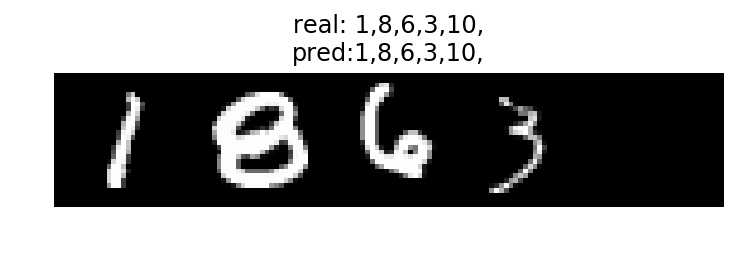

In [10]:
def get_result(result):
    # 将 one_hot 编码解码
    resultstr = ''
    for i in range(n_len):
        resultstr += str(np.argmax(result[i])) + ','
    return resultstr

index = random.randint(0, n_test-1)
y_pred = model.predict(X_test[index].reshape(1, height, width*n_len, 1))

plt.title('real: %s\npred:%s'%(get_result([y_test[x][index] for x in range(n_len)]), get_result(y_pred)))
plt.imshow(X_test[index,:,:,0], cmap='gray')
plt.axis('off')

### 保存模型

模型达到满意的效果以后，我们需要保存模型，以便下次调用。

读取的方式也很简单：`model = load_model('model.h5')`

In [11]:
model.save('model.h5')